In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [6]:
m = 2
b = 0.5
x = np.linspace(0, 4, 100)
y = m * x + b + np.random.randn(*x.shape) + 0.25

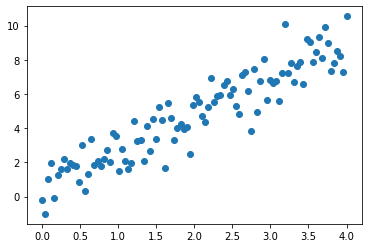

In [7]:
plt.scatter(x,y)

In [10]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)
        
    def __call__(self, x):
        return self.weight * x + self.bias
    
# model = Model()
# model(5,0)
# self.weight.assign_sub(15,0)

In [12]:
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))

In [16]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y, y_output)
        
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)

In [19]:
model = Model()
epochs = 100
learning_rate = 0.15
for epoch in range(epochs):
    y_output = model(x)
    loss = calculate_loss(y, y_output)
    print(f"Epoch: {epoch}, loss: {loss.numpy()}")
    train(model, x, y, learning_rate)

Epoch: 0, loss: 720.8016967773438
Epoch: 1, loss: 512.1000366210938
Epoch: 2, loss: 364.11297607421875
Epoch: 3, loss: 259.1510009765625
Epoch: 4, loss: 184.6820831298828
Epoch: 5, loss: 131.82723999023438
Epoch: 6, loss: 94.29560852050781
Epoch: 7, loss: 67.62950897216797
Epoch: 8, loss: 48.670013427734375
Epoch: 9, loss: 35.17838668823242
Epoch: 10, loss: 25.567665100097656
Epoch: 11, loss: 18.712810516357422
Epoch: 12, loss: 13.8160400390625
Epoch: 13, loss: 10.311511039733887
Epoch: 14, loss: 7.797755241394043
Epoch: 15, loss: 5.989805221557617
Epoch: 16, loss: 4.685309410095215
Epoch: 17, loss: 3.740481376647949
Epoch: 18, loss: 3.0530872344970703
Epoch: 19, loss: 2.550368547439575
Epoch: 20, loss: 2.1804909706115723
Epoch: 21, loss: 1.906478762626648
Epoch: 22, loss: 1.7019137144088745
Epoch: 23, loss: 1.547885537147522
Epoch: 24, loss: 1.4308266639709473
Epoch: 25, loss: 1.3409759998321533
Epoch: 26, loss: 1.2712887525558472
Epoch: 27, loss: 1.216660499572754
Epoch: 28, loss: 1.

In [20]:
print(model.weight.numpy())
print(model.bias.numpy())

2.1176
0.55949503


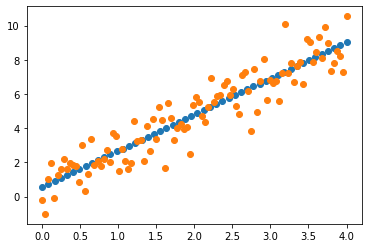

In [23]:
new_x = np.linspace(0, 4, 50)
new_y = model.weight.numpy() * new_x + model.bias.numpy()
plt.scatter(new_x, new_y)
plt.scatter(x,y)